In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
raw_data = pd.read_csv('clsn2_trn.csv', header=None)
tst_data = pd.read_csv('clsn2_tst.csv', header=None)

X_train = raw_data.iloc[:, :8].values
y_train = raw_data.iloc[:, 8].values

scaler = StandardScaler()
train_data = scaler.fit_transform(X_train)
test_data = scaler.transform(X_train)

train_data

array([[ 0.34447247,  0.29777038,  0.36252488, ...,  0.23672004,
         0.42107465,  0.66597528],
       [-0.49136504, -0.58230453, -0.57491808, ..., -0.39572407,
        -0.53023091, -0.58247262],
       [ 0.50468442,  0.53589463,  0.52316105, ...,  0.39862482,
         0.61651409,  0.73719123],
       ...,
       [ 2.37141437,  2.33301654,  2.14735548, ...,  2.07181065,
         2.10690251,  1.97680184],
       [ 0.39691269,  0.53458984,  0.14306898, ...,  0.46665086,
         0.54814141,  0.55027414],
       [ 1.94112114,  2.43598152,  2.11007657, ...,  2.20837185,
         2.12204298,  2.07347431]])

In [ ]:
input_layer = Input(shape=(8,))
encoder = Dense(32, activation="relu")(input_layer)
encoder = Dense(16, activation="relu")(encoder)
encoder = Dense(8, activation="relu")(encoder)
encoder_output = Dense(2, activation="relu")(encoder)
# decoder = Dense(2, activation="relu")(encoder_output)
decoder = Dense(8, activation="relu")(encoder_output)
decoder = Dense(16, activation="relu")(encoder_output)
decoder = Dense(32, activation="relu")(decoder)
decoder_output = Dense(8, activation="linear")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder_output)

Model.summary(autoencoder)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,826 (7.13 KB)

 Trainable params: 1,826 (7.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer="adam", loss="mean_squared_error")
history = autoencoder.fit(train_data, train_data,epochs=50,batch_size=32,shuffle=True,validation_split=0.2)

Epoch 1/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3827 - val_loss: 0.0290
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0298 - val_loss: 0.0287
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0289 - val_loss: 0.0283
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0286 - val_loss: 0.0280
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0285 - val_loss: 0.0281
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0285 - val_loss: 0.0282
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0285 - val_loss: 0.0279
Epoch 8/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0287 - val_loss: 0.0279
Epoch 9/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0279 - val_loss: 0.0280
Epoch 10/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0291 - val_loss: 0.0280
Epoch 11/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0288 - val_loss: 0.0280
Epoch 12/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
encoder_model = Model(inputs=input_layer, outputs=encoder_output)
encoded_test_data = encoder_model.predict(test_data)

473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


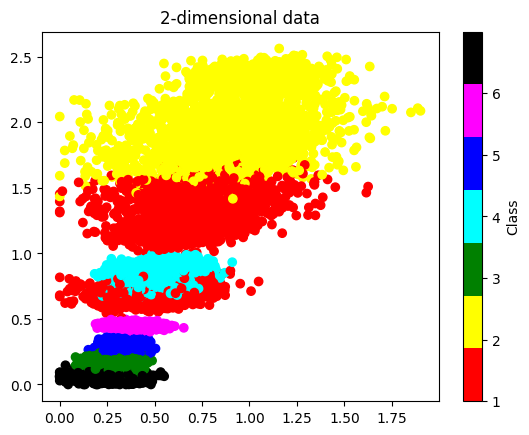

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ['red', 'yellow', 'green', 'cyan', 'blue', 'magenta', 'black']
cmap = ListedColormap(colors)
plt.scatter(encoded_test_data[:, 0], encoded_test_data[:, 1], c=y_train,cmap=cmap)
plt.title('2-dimensional data')
plt.colorbar(ticks=range(7), label='Class')
plt.savefig("reduced_dims_visualization.png", dpi=300)
plt.show()

In [ ]:
test_data_with_pred = np.column_stack((raw_data,encoded_test_data))
np.savetxt("reduced_dim.csv", test_data_with_pred, delimiter=",")

df = pd.read_csv("reduced_dim.csv", header=None)
df =df.round(4)
df.to_csv("reduced_dim.csv", index=False, header=None)

In [ ]:
encoder_model.save("report4.h5")

In [ ]:
!pip freeze > util4.txt

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


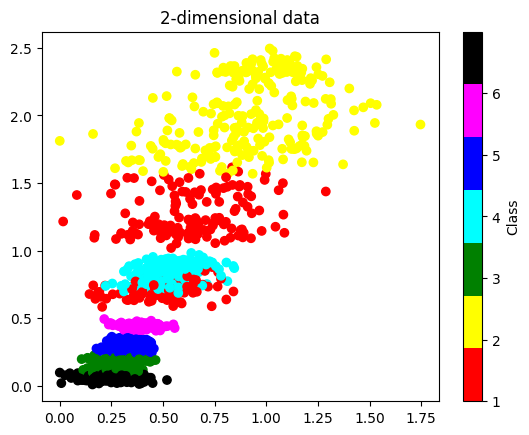

In [ ]:
tst_data = pd.read_csv('clsn2_ans.csv', header= None)
X_tst = tst_data.iloc[:, :8].values
y_tst = tst_data.iloc[:, 8].values

tst_data = scaler.transform(X_tst)

encoded_tst_data = encoder_model.predict(tst_data)
colors = ['red', 'yellow', 'green', 'cyan', 'blue', 'magenta', 'black']
cmap = ListedColormap(colors)
plt.scatter(encoded_tst_data[:, 0], encoded_tst_data[:, 1], c=y_tst,cmap=cmap)
plt.title('2-dimensional data')
plt.colorbar(ticks=range(7), label='Class')
plt.show()